In [1]:
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt

import os
import glob

In [6]:
path_to_dir = r'C:\Users\HP\Desktop\Git\evapotranspiration\raw_data'

In [11]:
os.listdir(path_to_dir)

['20210708C0AD-Aylık Global Güneş Radyasyonu Toplamı (kwsaat÷m²) .txt',
 '20210708C0AD-Aylık Maksimum Küresel Güneş Radyasyonu watt÷m².txt',
 '20210708C0AD-Aylık Maksimum Nispi Nem (%).txt',
 '20210708C0AD-Aylık Maksimum Sıcaklık (°C).txt',
 '20210708C0AD-Aylık Minimum Nispi Nem (%).txt',
 '20210708C0AD-Aylık Minimum Sıcaklık (°C).txt',
 '20210708C0AD-Aylık ortalama 20cm toprak nemi (%).txt',
 '20210708C0AD-Aylık Ortalama Nispi Nem (%).txt',
 '20210708C0AD-Aylık Ortalama Rüzgar Hızı (m÷sn).txt',
 '20210708C0AD-Aylık Ortalama Sıcaklık (°C).txt',
 '20210708C0AD-Aylık Ortalama Toprak Nemi 40cm %.txt',
 '20210708C0AD-Aylık Ortalama Toprak Nemi 80cm % .txt',
 '20210708C0AD-Aylık Toplam Açık Yüzey Buharlaşması (mm).txt',
 '20210708C0AD-Aylık Toplam Güneşlenme Süresi (saat).txt',
 '20210708C0AD-Aylık Toplam Yağış (mm=kg÷m²) MANUEL.txt',
 '20210708C0AD-Aylık Toplam Yağış (mm=kg÷m²) OMGİ .txt',
 '20210708C0AD-Günlük Toplam Global Güneşlenme Şiddeti Aylık Ortalaması (cal÷cm²).txt',
 '20210708C0A

In [34]:
path = r"C:\Users\HP\Desktop\Git\University-Research\processed_data\station_definitions.csv"

In [35]:
st_def = pd.read_csv(path)

In [36]:
cond = st_def['region'] == 'Ege'
df = st_def.loc[cond].reset_index(drop=True)

In [37]:
df

,st_num,st_name,province,district,latitude,longitude,elevation,region
0,17154,K?TAHYA ZAFER HAVAL?MANI,Kütahya,Alt?nta?,39.113600,30.13020,1011.0,Ege
1,17755,K?TAHYA HAVAL?MANI,Kütahya,Merkez,39.419800,30.02240,922.0,Ege
2,17180,D?K?L?,İzmir,Dikili,39.073700,26.88800,3.0,Ege
3,17181,AKH?SAR HAVAL?MANI,Manisa,Akhisar,38.809500,27.83400,79.0,Ege
4,17184,AKH?SAR,Manisa,Akhisar,38.911800,27.82330,92.0,Ege
...,...,...,...,...,...,...,...,...
211,19164,AFYONKARAH?SAR KUMALAR TEPES? RADAR SAHASI,Afyonkarahisar,?uhut,38.401250,30.41860,2237.0,Ege
212,18947,SANDIKLI /BALLIK K?Y?,Afyonkarahisar,Sand?kl?,38.290500,30.23870,1208.0,Ege
213,17488,AL?A?A TRAF?K G?ZETLEME KEGM,İzmir,Alia?a,38.833433,26.94180,54.0,Ege
214,19281,?ARDAK,Denizli,?ardak,37.832410,29.66947,917.0,Ege


In [38]:
path = r"C:\Users\HP\Desktop\Git\University-Research\processed_data\ET0_data_1.csv"
et = pd.read_csv(path)

In [39]:
cond = et['st_num'].isin(df['st_num'])
marmara_stations = et.loc[cond, 'st_num'].unique()

In [40]:
def plot_map(stations,
             color='blue',
             path_to_st_def = r"C:\Users\HP\Desktop\Git\University-Research\processed_data\station_definitions.csv"):
    
    
    
    tiles = 'https://stamen-tiles-{s}.a.ssl.fastly.net/terrain-background/{z}/{x}/{y}{r}.png'
    attr = 'Map tiles by <a href="http://stamen.com">Stamen Design</a>, <a href="http://creativecommons.org/licenses/by/3.0">CC BY 3.0</a> &mdash; Map data &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors'
    location = [39, 35.5]
    zoom = 6
    marker_radius = 3
    
    # Loading station definitions
    st_def = pd.read_csv(path_to_st_def)[['st_num', 'latitude', 'longitude', 'elevation']]

    # Merging station definitions with station scores
    cond = st_def['st_num'].isin(stations)
    df = st_def.loc[cond].reset_index(drop=True)
    
    m = folium.Map(location = location, zoom_start = zoom, tiles = tiles, attr = attr)


    for row in df.iterrows():
        row = row[1]

        # Location of station
        loc = [row['latitude'], row['longitude']]

        # Text in pop-up
        txt = ''
        txt += '<h5><b>Station: {}\n</h5></b>'.format(row['st_num'])
        txt += 'Elevation: {}'.format(row['elevation'])
        popup = folium.Popup(txt, min_width = 100, max_width = 100)
        folium.CircleMarker(location = loc,
                            fill = True,
                            fill_opacity = 0.8,
                            opacity = 1,
                            color = color,
                            radius = marker_radius
                            ).add_child(popup).add_to(m)

    display(m)

    return m

In [57]:
st = np.random.choice(marmara_stations, size=10, replace=False)
m = plot_map(st)


In [58]:
st

array([17186, 17237, 17298, 17886, 17924, 17824, 17884, 17296, 17860,
       17862], dtype=int64)

In [65]:
cond = df['st_num'].isin(st)
others = df.loc[~cond]

_ = others['st_num'].sample(5).to_numpy()

stations = np.concatenate([_, st])

In [68]:
stations

array([18822, 17257, 18298, 17227, 18032, 17186, 17237, 17298, 17886,
       17924, 17824, 17884, 17296, 17860, 17862], dtype=int64)

In [70]:
paths = os.listdir(path_to_dir)

In [73]:
path = os.path.join(path_to_dir, paths[0])
test = pd.read_csv(path, sep='|')

In [99]:
def replace_stations(file_name, st_to_keep, read_path, save_path):
    path = os.path.join(read_path, file_name)
    
    df = pd.read_csv(path, sep='|')
    
    col_name = 'Istasyon_No'
    if file_name == 'station_definitions.txt':
        col_name = '?stasyon Numaras?'
        
    cond = df[col_name].isin(st_to_keep)
    df = df.loc[cond]
    
    path = os.path.join(save_path, file_name)
    df.to_csv(path, sep='|', index=False)

In [100]:
files = os.listdir(path_to_dir)
# files.remove('station_definitions.txt')
files.remove('new_files')

In [101]:
save_path = r'C:\Users\HP\Desktop\Git\evapotranspiration\raw_data\new_files'
read_path = path_to_dir
st_to_keep = stations

for file_name in files:
    print(file_name)
    replace_stations(file_name, st_to_keep, read_path, save_path)
    

20210708C0AD-Aylık Global Güneş Radyasyonu Toplamı (kwsaat÷m²) .txt
20210708C0AD-Aylık Maksimum Küresel Güneş Radyasyonu watt÷m².txt
20210708C0AD-Aylık Maksimum Nispi Nem (%).txt
20210708C0AD-Aylık Maksimum Sıcaklık (°C).txt
20210708C0AD-Aylık Minimum Nispi Nem (%).txt
20210708C0AD-Aylık Minimum Sıcaklık (°C).txt
20210708C0AD-Aylık ortalama 20cm toprak nemi (%).txt
20210708C0AD-Aylık Ortalama Nispi Nem (%).txt
20210708C0AD-Aylık Ortalama Rüzgar Hızı (m÷sn).txt
20210708C0AD-Aylık Ortalama Sıcaklık (°C).txt
20210708C0AD-Aylık Ortalama Toprak Nemi 40cm %.txt
20210708C0AD-Aylık Ortalama Toprak Nemi 80cm % .txt
20210708C0AD-Aylık Toplam Açık Yüzey Buharlaşması (mm).txt
20210708C0AD-Aylık Toplam Güneşlenme Süresi (saat).txt
20210708C0AD-Aylık Toplam Yağış (mm=kg÷m²) MANUEL.txt
20210708C0AD-Aylık Toplam Yağış (mm=kg÷m²) OMGİ .txt
20210708C0AD-Günlük Toplam Global Güneşlenme Şiddeti Aylık Ortalaması (cal÷cm²).txt
20210708C0AD-Günlük Toplam Güneşlenme Süresi Aylık Ortalaması (saat).txt
station_

In [96]:
path = r"C:\Users\HP\Desktop\Git\evapotranspiration\raw_data\new_files\20210708C0AD-Aylık Global Güneş Radyasyonu Toplamı (kwsaat÷m²) .txt"
pd.read_csv(path, sep='|')

,Istasyon_No,Istasyon_Adi,YIL,AY,TOPLAM_KURESEL_GUNES_RADYASYONU_kws
0,17186,MAN?SA,2005,1,39.8
1,17186,MAN?SA,2005,2,59.8
2,17186,MAN?SA,2005,3,111.4
3,17186,MAN?SA,2005,4,153.4
4,17186,MAN?SA,2005,5,179.6
...,...,...,...,...,...
297,18032,KARABURUN,2013,7,0.0
298,18032,KARABURUN,2013,8,0.0
299,18032,KARABURUN,2013,9,0.0
300,18032,KARABURUN,2013,10,0.0


Processed station definitions file

In [107]:
cond = st_def['st_num'].isin(stations)
stations = st_def[cond].reset_index(drop=True).drop(columns=['st_name', 'district', 'region'])

In [109]:
stations.to_csv(r"C:\Users\HP\Desktop\Git\evapotranspiration\processed_data\station_definitions.csv", index=False)

### Vairable size heatmap

In [168]:
import seaborn as sns
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

## weee

In [291]:
def corr_heatmap(data, figsize=(8, 8)):
    '''
    Create a correlation heatmap with square sizes varying according to the absolute correlation value.
    Code based on: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
    '''
    # Size scale 
    size_scale = 500
    
    # Color map
    palette = sns.diverging_palette(20, 220, as_cmap=True)
    
    
    # Computing correlations
    corr = data.corr()
    corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
    corr.columns = ['x', 'y', 'value']
    
    x = corr['x']
    y = corr['y']
    size = corr['value'].abs()
    color = corr['value']

    fig, ax = plt.subplots(figsize=figsize)
    
    dim = data.shape[1]
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)}
    
    # y-ticks are inverted to put the identical values on the main diagonal
    y_to_num = {p[1]:-p[0] for p in enumerate(y_labels)}
    num_to_y = {val:key for key, val in y_to_num.items()}
    
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s', # Use square as scatterplot marker
        c=color,
        cmap=palette)
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')

    yticks = np.sort([y_to_num[v] for v in y_labels])
    ax.set_yticks(yticks)
    ax.set_yticklabels([num_to_y[i] for i in yticks])
    
    # Setting minor ticks to create the grid
    ax.grid(False, 'major')
    ax.grid(True, 'minor', color='w', lw=2)
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t - 0.5 for t in ax.get_yticks()], minor=True)
    
    ax.set_xlim(-0.5, ax.get_xticks(minor=True)[-1])
    ax.set_ylim(ax.get_yticks(minor=True)[0], 0.5)
    
    ax.set_facecolor('#F4F4F4')
    
    for side in ['left', 'right', 'top', 'bottom']:
        ax.spines[side].set_visible(False)
        
    ax.tick_params(left=False, which='both')
    ax.tick_params(bottom=False, which='both')
    
    cmappable = ScalarMappable(norm=Normalize(-1,1), cmap=palette)
    cb = plt.colorbar(cmappable, ticks=[-1, 0, 1])
    
    # Hiding colorbar outline
    cb.outline.set_visible(False)
    
    return ax

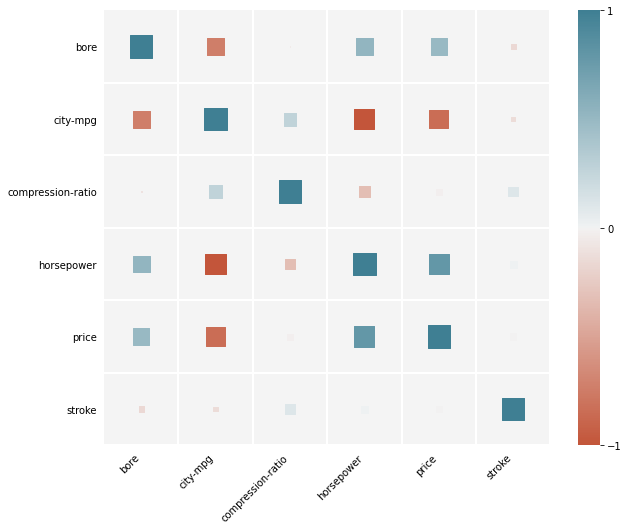

In [292]:
data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')
columns = ['bore', 'stroke', 'compression-ratio', 'horsepower', 'city-mpg', 'price'] 

ax = corr_heatmap(data[columns], figsize=(10, 8))
plt.show()

In [288]:
path_to_dir = r'C:\Users\HP\Desktop\Git\evapotranspiration\processed_data'
file_name = 'ET0_data.csv'
path = os.path.join(path_to_dir, file_name)

df = pd.read_csv(path)

In [289]:
cols = ['max_temp', 'avg_temp', 'inc_rad', 'avg_hum', 'avg_ws', 'ET0']

data = df[cols]
ax = corr_heatmap(data, figsize=(9, 8))

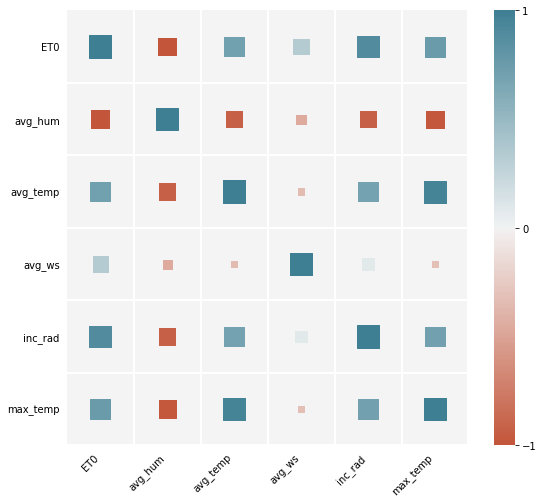

In [290]:
ax = corr_heatmap(data, figsize=(9, 8))

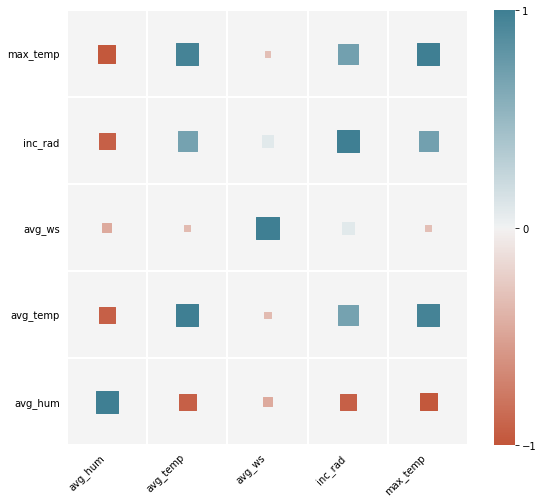

In [204]:
corr_heatmap(data, figsize=(9, 8))

In [91]:
# RdBu